# DEMOGRAPHIC DATA ANALYZER

This is me 'completing' a project designed by freecodecamp, except using Jupyter. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
path = r'/Users/bryanleavelle/DATA PROJECTS/medical-data-viz'

In [3]:
df = pd.read_csv(os.path.join(path, 'medical_examination.csv'))

# TABLE OF CONTENTS

#### CHECK AND CLEAN
#### TASK 1: ADD OVERWEIGHT COLUMN
#### TASK 2:  NORMALIZE DATA
#### TASK 3: CONVERT TO LONG AND MAKE A CHART
#### TASK 4: CLEAN DATA
#### TAKS 5: HEATMAP

# FIRST CHECK AND CLEAN

In [4]:
df.shape

(70000, 13)

In [5]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
df.dtypes

id               int64
age              int64
sex              int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [7]:
#finds mixed data types in all columns in DF

for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)
  else:
    print('all good')

all good
all good
all good
all good
all good
all good
all good
all good
all good
all good
all good
all good
all good


In [8]:
# check for missing values
df.isnull().sum()

id             0
age            0
sex            0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
# check for duplicates

df_dups = df[df.duplicated()]

In [10]:
df_dups

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


## no mixed data, no dups, no nulls. lookin good, lets rock.

# TASK 1: 
## Add an overweight column to the data. 
further instructions :
To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [11]:
#first lets make a new BMI columnn. We know that the weight is already in kg, but the height is in cm and must
#be converted.

df['BMI'] = (df['weight']/((df['height']/100)**2)).round(decimals = 1)

In [12]:
df.head(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.9
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.5
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.7
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0


sweet

In [13]:
#create another new column with an overweight flag

df.loc[(df['BMI'] <= 25), 'overweight'] = 0
df.loc[(df['BMI'] > 25), 'overweight'] = 1

In [14]:
df.head(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0,0.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.9,1.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.5,0.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.7,1.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0,0.0


double sweet. NEXT

# TASK 2: 
## Normalize the data by making 0 always good and 1 always bad. 
If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [15]:
#save a new df for safety

df_norm = df

In [16]:
#normalize cholesterol

df_norm.loc[(df_norm['cholesterol'] == 1), 'cholesterol'] = 0
df_norm.loc[(df_norm['cholesterol'] > 1), 'cholesterol'] = 1

In [17]:
#normalize gluc

df_norm.loc[(df_norm['gluc'] == 1), 'gluc'] = 0
df_norm.loc[(df_norm['gluc'] > 1), 'gluc'] = 1

In [18]:
#check

df_norm.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,22.0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.9,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.5,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.7,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.0,0.0


Hell ya. Next.

# TASK 3:
## Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. 

In [19]:
# convert to long format and split by cardio

df_norm = pd.melt(df.reset_index(), id_vars='cardio', value_vars=['active', 'alco', 'cholesterol', 'gluc', 
                                                     'overweight', 'smoke'])

In [20]:
df_norm

,cardio,variable,value
0,0,active,1.0
1,1,active,1.0
2,1,active,0.0
3,1,active,1.0
4,0,active,0.0
...,...,...,...
419995,0,smoke,1.0
419996,1,smoke,0.0
419997,1,smoke,0.0
419998,1,smoke,0.0


beautiful.

In [21]:
#reshape with counts for each type of cardio and variable combination

df_chart = df_norm.value_counts().reset_index(name="count")

In [22]:
df_chart

,cardio,variable,value,count
0,1,alco,0.0,33156
1,0,alco,0.0,33080
2,1,smoke,0.0,32050
3,0,smoke,0.0,31781
4,0,gluc,0.0,30894
5,0,cholesterol,0.0,29330
6,0,active,1.0,28643
7,1,gluc,0.0,28585
8,1,active,1.0,27618
9,1,overweight,1.0,24362


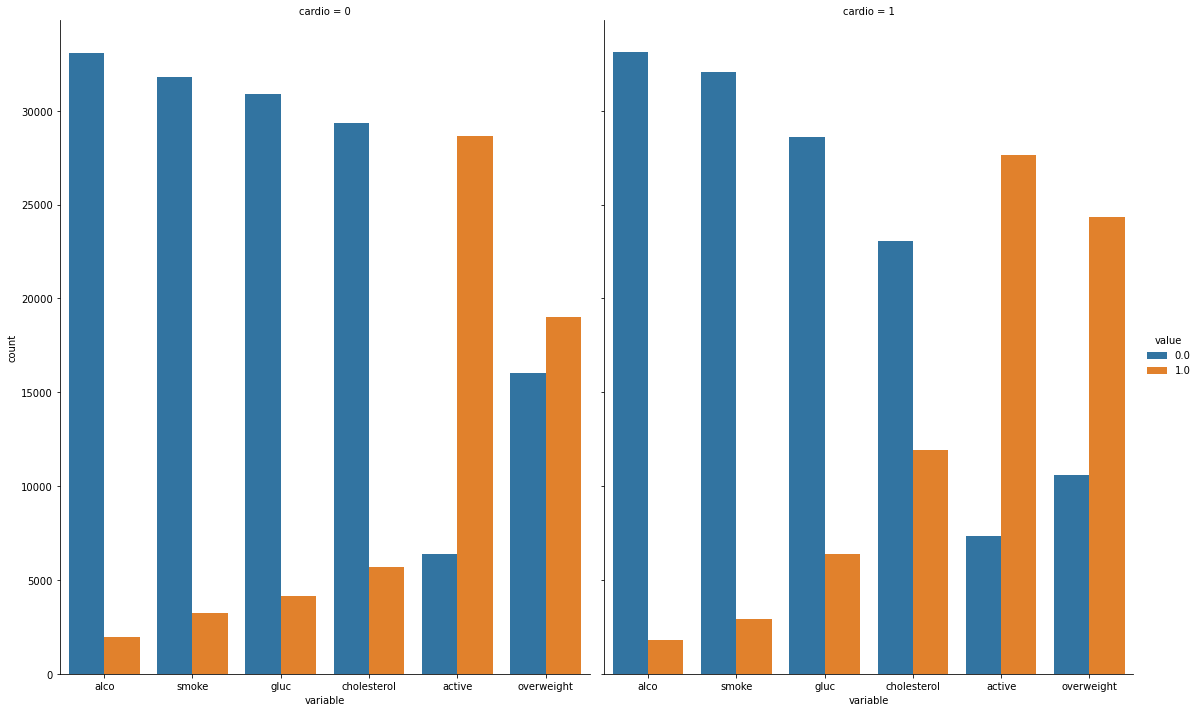

In [23]:
#make a bar chart

graph = sns.catplot(x="variable", y='count',col="cardio", hue = 'value',
                 data=df_chart,
                 kind="bar", height=10, aspect=.8)

Wild that by far the biggest factor here seems to be whether a person is overweight or eat a lot of cholesterol.
Anywho, NEXT

# TASK 4:

## Clean the data. 
Filter out the following patient segments that represent incorrect data:
<br>-diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
<br>-height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
<br>-height is more than the 97.5th percentile
<br>-weight is less than the 2.5th percentile
<br>-weight is more than the 97.5th percentile

### im gonna do these one at a time.

In [86]:
#remove rows where ap_lo is greater than ap_hi

df_filtered = df[(df['ap_lo'] <= df['ap_hi'])]

In [87]:
#remove height that is less than 2.5 percentile

df_filtered = df_filtered[(df_filtered['height'] >= df_filtered['height'].quantile(0.025))]

In [88]:
# remove height that is higher than 97.5 percentile

df_filtered = df_filtered[(df_filtered['height'] <= df_filtered['height'].quantile(0.975))]

In [89]:
#remove weight that lower than 2.5 percentile

df_filtered = df_filtered[(df_filtered['weight'] >= df_filtered['weight'].quantile(0.025))]

In [90]:
#remove height that is higher than 97.5 percentile

df_filtered = df_filtered[(df_filtered['weight'] <= df_filtered['weight'].quantile(0.975))]

In [91]:
df_filtered.shape

(62784, 15)

In [93]:
df_filtered.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,22.0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.9,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.5,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.7,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.0,0.0


In [97]:
# I want to check, but what was the 97.5 percentile and 2.5 percentile cutoff?

df['weight'].quantile(0.975)

108.0

In [111]:
#check lower quartile in weight
df['weight'].quantile(.0025)

42.0

In [109]:
#so df_filtered should not contain any weights over 108 or under 42

df_filtered['weight'].sort_values()

15283     52.0
58937     52.0
67116     52.0
16476     52.0
68059     52.0
         ...  
52330    106.0
52729    106.0
55138    106.0
4917     106.0
25031    106.0
Name: weight, Length: 62784, dtype: float64

NICE.

In [113]:
# check height upper and lower percentile cutoffs

df['height'].quantile(0.975)

180.0

In [114]:
df['height'].quantile(0.025)

150.0

In [115]:
#df_filtered values should not contain any heights above 180 or below 150

df_filtered['height'].sort_values()

67707    150
15993    150
52524    150
39295    150
7154     150
        ... 
39994    180
26669    180
49749    180
9812     180
39741    180
Name: height, Length: 62784, dtype: int64

Sick. I think I'm done here. ON TO THE FINAL TASK.

# TASK 6: 
## Create a correlation matrix using the dataset. 
### Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. 

In [125]:
# first, make a correlation matrix

corr = df_filtered.corr().round(2)

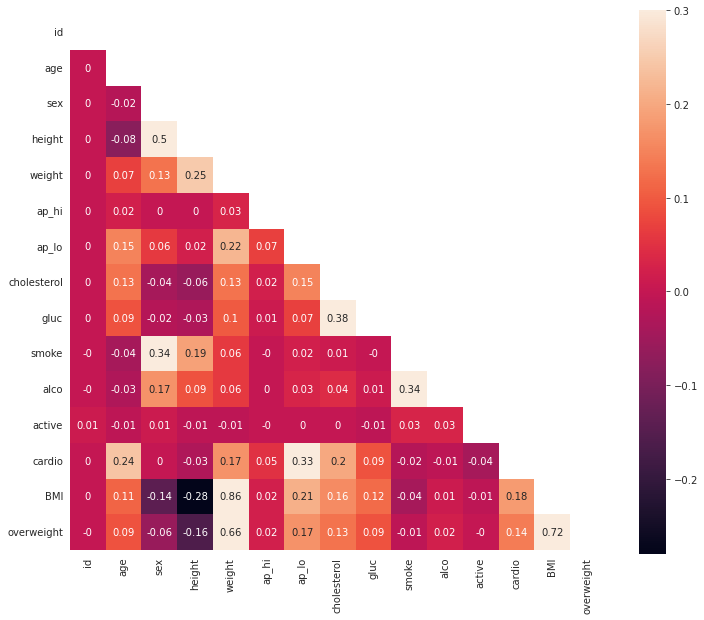

In [126]:
# build the heat map 

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     f, ax = plt.subplots(figsize=(12, 10))
     ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot = True)

My numbers match the numbers in the example given by freecodecamp, except the rounded up to 1 decimal and  rounded to 2

# FIN